In [2]:
import main0_expansion_surgical as es
from imp import reload
from meshLab_script import meshlab_resave
reload(es)
tumour_filepath_stl = r'D:\code\demo\data\tumor.stl'
expend_size=10 #扩充的大小,单位为毫米
es.expansion_surgical(tumour_filepath_stl,expend_size)  # 肿瘤扩充

In [3]:
meshlab_resave("D:/code/demo/data/liver.stl","D:/code/demo/data/liver.ply")
meshlab_resave("D:/code/demo/data/m_vessel.stl","D:/code/demo/data/m_vessel.ply")
meshlab_resave("D:/code/demo/data/g_vessel.stl","D:/code/demo/data/g_vessel.ply")
meshlab_resave("D:/code/demo/data/tumor.stl","D:/code/demo/data/tumor.ply")
meshlab_resave("D:/code/demo/data/tumor_enlarged.stl","D:/code/demo/data/tumor_enlarged.ply")

In [13]:
import os
import main1_voxelize as vx
from imp import reload
os.chdir("D:/code/demo")
reload(vx)

Liver_filepath_ply = 'data/liver.ply'
artery_filepath_ply = r'data/m_vessel.ply'
vein_filepath_ply = r'data/g_vessel.ply'
tumour_ply = r'data/tumor.ply'
extumour_ply = r'data/tumor_enlarged.ply'
vx.voxelize(Liver_filepath_ply, artery_filepath_ply, vein_filepath_ply, tumour_ply, extumour_ply)

肝实质体素化完成
门静脉体素化完成
肝静脉体素化完成
占位体素化完成
占位扩充体素化完成
weipu_file体素化完成
-130.2740936279297
1554.072265625
-107.12590026855469
(203, 151, 143)
1
2
3
4
体素化完成
体素化完成


In [5]:
global i
i=1
import numpy as np
def reshape(a, b, c):
    a = np.array(a).T
    b = np.array(b).T
    c = np.array(c).T
    m = np.concatenate((a, b, c), axis=1)
    return m
os.chdir("D:/code/demo")

#体素化肝脏、门静脉、肝静脉、占位
extumour_path = 'data/tumor_enlarged.npy'
matrix2 = np.load(extumour_path)
matrix2 = reshape([np.where(matrix2 == 5)[0]], [np.where(matrix2 == 5)[1]], [np.where(matrix2 == 5)[2]])
np.save("data/tumor_random" + str(i) + ".npy",matrix2)


执行skeleton_index_search.py
执行skeleton_to_vessel.py
可视化查看血管根部点get_coordinate.py

In [2]:
# 门静脉起始填充点(红色)
x_l1 = 103
y_l1 = 52
z_l1 = 92
# 肝静脉起始填充点(蓝色)
x_l2 = 92
y_l2 = 30
z_l2 = 59

In [ ]:
import vessel_tree as vt #这步必须经过main3_seem6
import vessel_hash as vh
from imp import reload
reload(vt)
reload(vh)
vh.hash_vessel()
vt.tree_vessel([x_l1,y_l1,z_l1],[x_l2,y_l2,z_l2])

2.0
3.0
索引对应表加载完成
缺血体积: 172552.89599999998 mm^3
淤血体积: 145442.30399999997 mm^3


C:\Users\1\Anaconda3\envs\py38\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


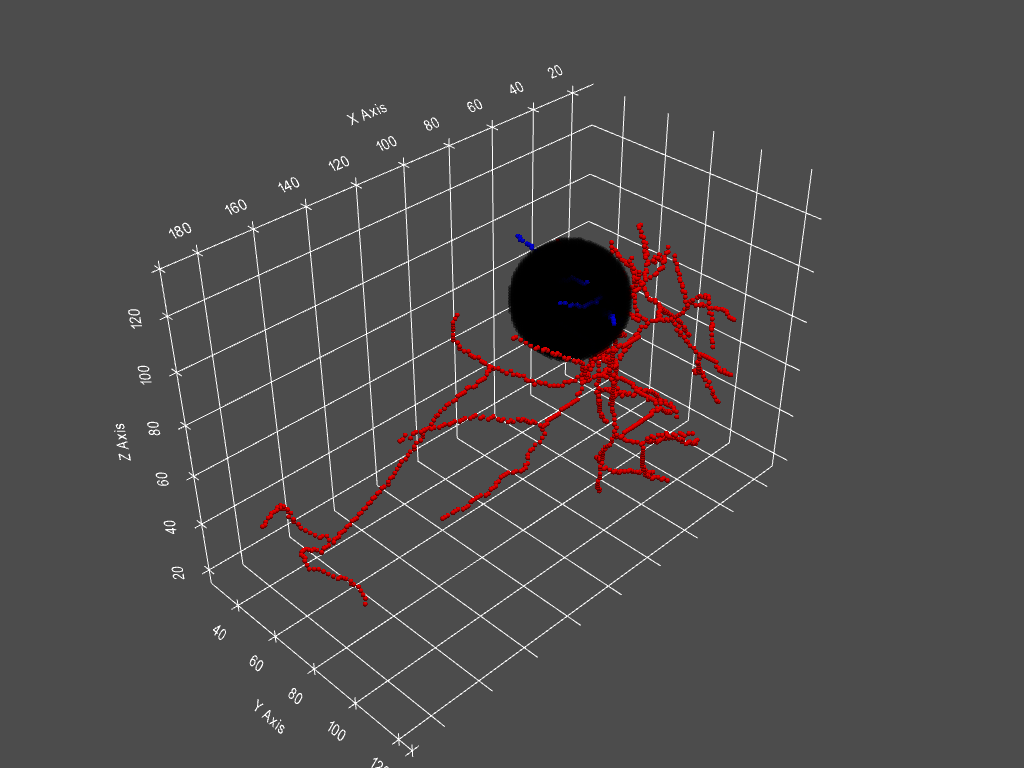

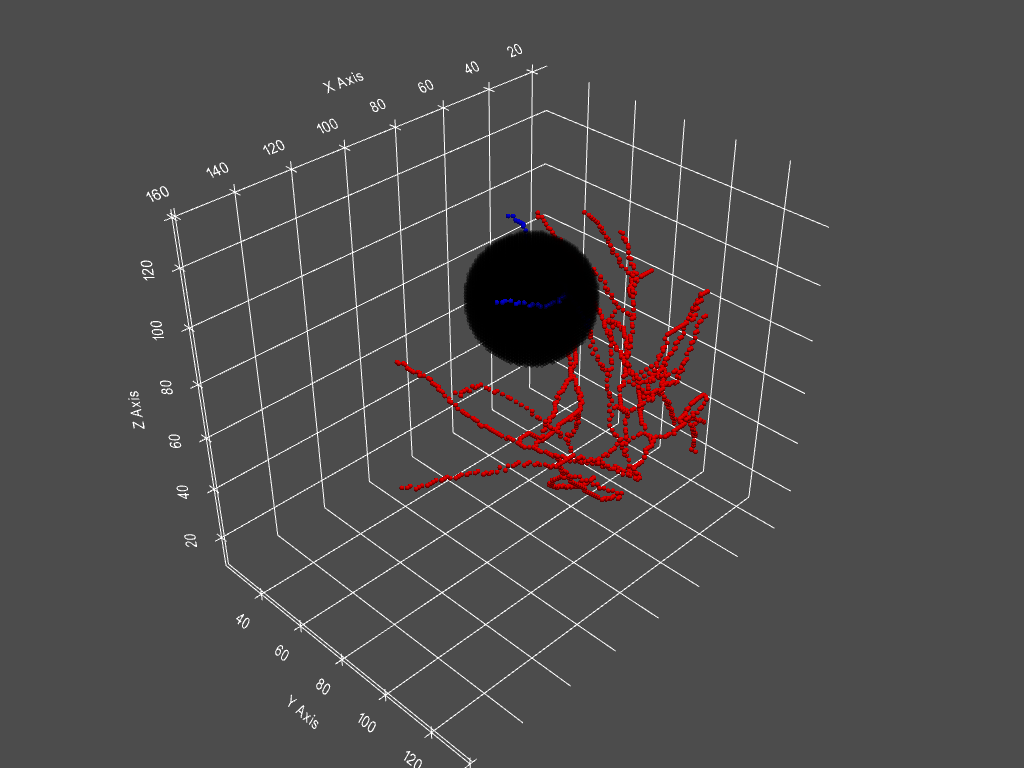

In [2]:
i=1
import dead_total_version3 as dt #这步必须经过main3_seem6
from imp import reload
reload(dt)
Liver_filepath_npy = 'data/liver.npy'
artery_filepath_npy = 'data/m_vessel.npy'
vein_filepath_npy = 'data/g_vessel.npy'
tumour_filepath_npy = 'data/tumor_random'+str(i)+ '.npy'

dt.dead_total(Liver_filepath_npy, artery_filepath_npy, vein_filepath_npy, tumour_filepath_npy, i,
                x_l1,y_l1,z_l1,x_l2,y_l2,z_l2)  
# 查找死亡的的肝细胞

2.0
3.0
索引对应表加载完成
缺血体积: 254952.57599999997 mm^3
淤血体积: 145442.30399999997 mm^3
0.89
活细胞体积: 724468
总体积体积: 812843
活细胞占比: 0.89
优化结束!
活细胞占比: 0.89


C:\Users\1\Anaconda3\envs\py38\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


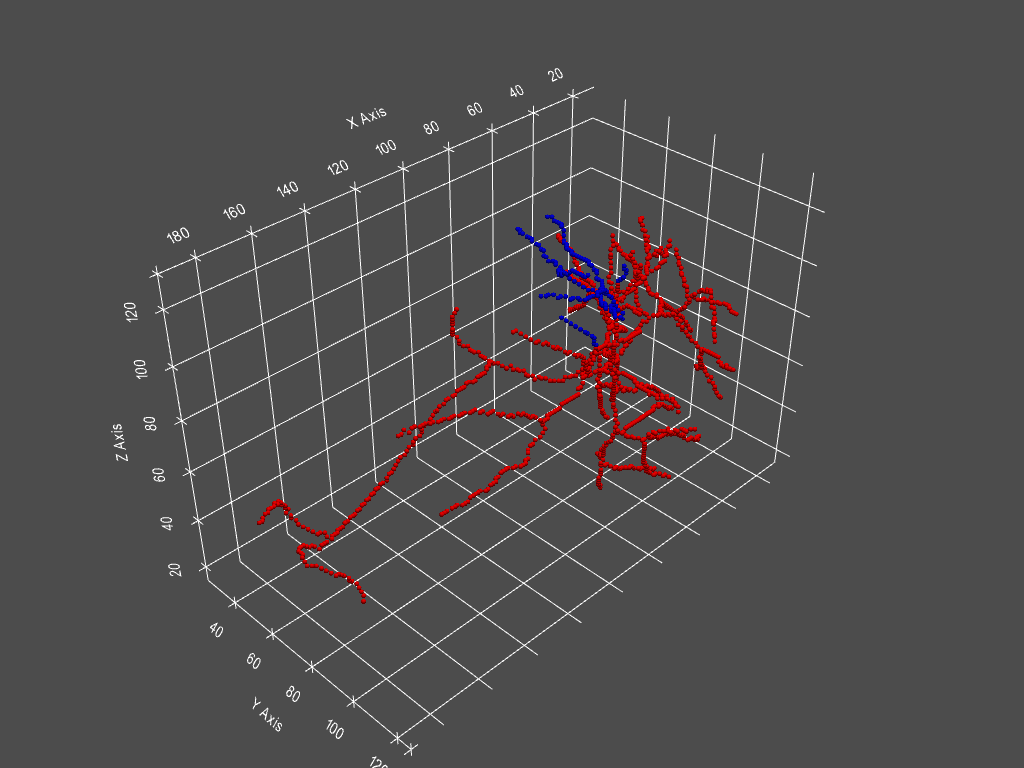

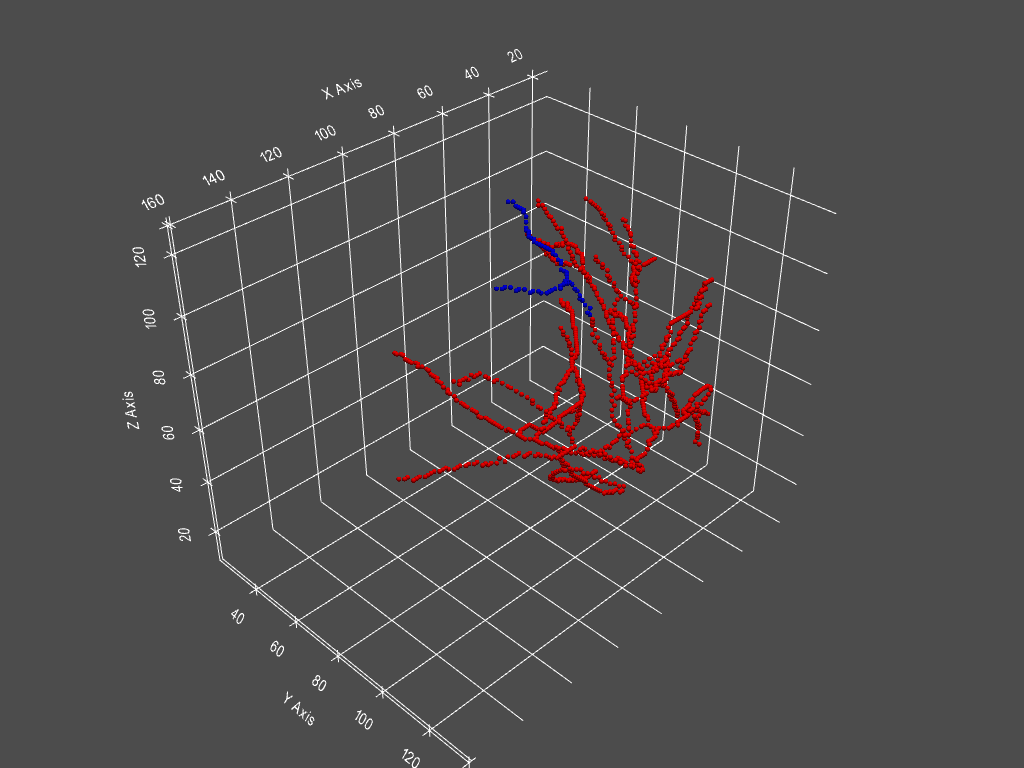

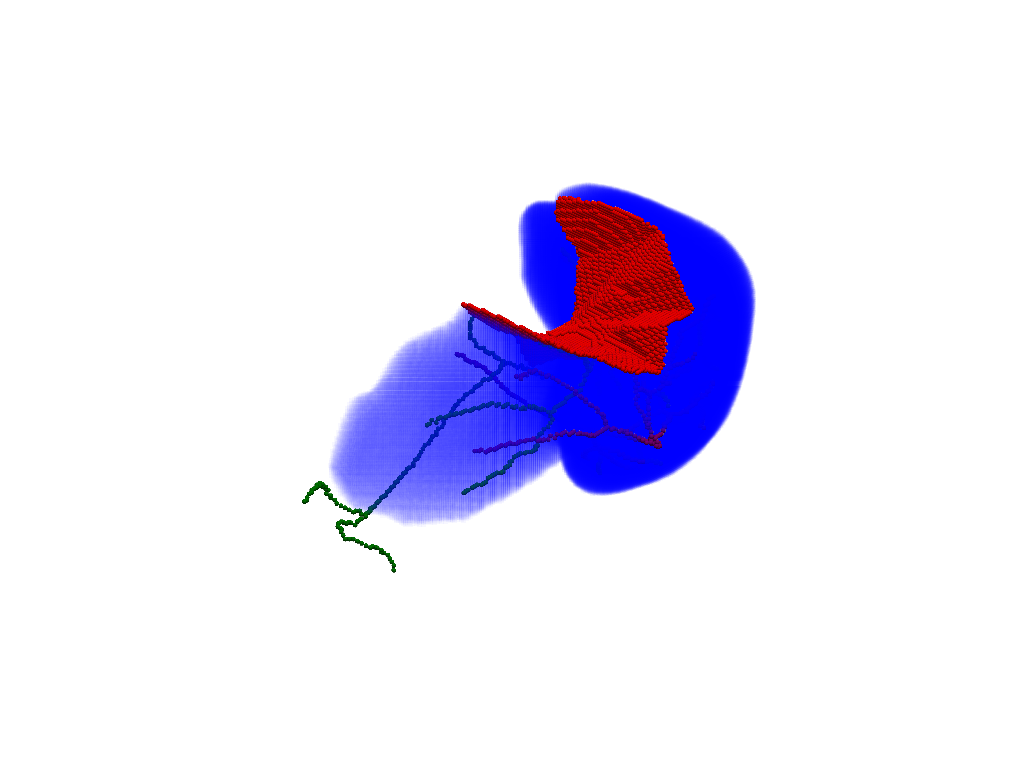

In [3]:
i=1
import annealing_version5 as al
from imp import reload
reload(al)

CURVATURE_WEIGHT = 0
DEAD_CELL_WEIGHT = 50 #死细胞的权重
CUT_ALIVECELL_WEIGHT = -50#活细胞的权重
SURFACE_WEIGHT = -5 #表面积的权重:
CUT_VESSEL_WEIGHT = -0.5
VESSEL_FIELD_WEIGHT = -5

al.annealing(i,CURVATURE_WEIGHT,DEAD_CELL_WEIGHT, SURFACE_WEIGHT, CUT_ALIVECELL_WEIGHT, CUT_VESSEL_WEIGHT, [x_l1,y_l1,z_l1], [x_l2,y_l2,z_l2], VESSEL_FIELD_WEIGHT)

In [3]:
import main5_dataprocess as dp
from imp import reload
reload(dp)
# i = 3 #占位的序号
dp.process(i)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
切除肝脏体积占比: 10.91 %
肿瘤体积占比: 0.4599 %
肝脏断面面积: 8383.68 mm^2
起初淤血血体积占比: 10.4024 %
起初缺血血体积占比: 12.3414 %
优化后缺血体积占比: 0.0 %
优化后淤血体积占比: 0.0131 %
保存成功!


In [4]:
i=1
import main6_toply as tp
from imp import reload
reload(tp)
# i=3 #占位序号
live_path = "res/liver_remain" + str(i) + ".npy"
blood_1_path = "res/m_vessel_cut" + str(i) + ".npy"
blood_2_path = "res/g_vessel_cut" + str(i) + ".npy"
cut_cell_path = "res/liver_cut" + str(i) + ".npy"
tumour_path="data/tumor.npy"
tp.toply(live_path,blood_1_path,blood_2_path,cut_cell_path,tumour_path,i)

肝实质保存成功
门静脉保存成功
肝静脉保存成功
切除细胞保存成功
随机占位保存成功


meshLab_script.py
main7_smooth.py
main8_visualize.py

In [2]:
from score import weipu_score
weipu_score([x_l1,y_l1,z_l1],[x_l2,y_l2,z_l2])



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
切除肝脏体积占比: 18.75 %
肿瘤体积占比: 0.4599 %
肝脏断面面积: 47473.92 mm^2
起初淤血血体积占比: 10.4024 %
起初缺血血体积占比: 12.3414 %
优化后缺血体积占比: 19.2352 %
优化后淤血体积占比: 29.0228 %
保存成功!
